<a href="https://colab.research.google.com/github/dlcastan/ProyectoDSIII/blob/main/ProyectoDSIII_Lopez_Castan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso:** Data Science III: NLP & Deep Learning aplicado a Ciencia de Datos
# **Comisión 61625**
# **Alumno:** Diego Lopez Castan

# **Presentación del proyecto**

# Abstract

Este conjunto de datos proporciona una visión detallada de los 100 libros más vendidos de Amazon, junto con sus reseñas de clientes, calificaciones, precios y más. Datos recopilados en noviembre de 2023.


# Objetivo

**Analizar las relaciones entre el rating de un libro y sus géneros:**
Identificar si ciertos géneros están asociados con mejores ratings en general.

**Estudio de la relación entre el número de géneros y el rating de un libro:** Analizar si los libros que pertenecen a un genero específico recibe mejor rating.


# Hipotesis

El análisis de los comentarios de los usuarios permite identificar con precisión el sentimiento asociado (positivo o negativo) a los libros más relevantes del sitio amazon.com, utilizando características textuales como las palabras empleadas, su frecuencia y contexto."

**Fuente**

https://www.kaggle.com/datasets/anshtanwar/top-200-trending-books-with-reviews/data

#**Lectura de datos**

# Campos del archivo Top-100_Trending_Books.csv

**Book Rank: :** Indica la posición del libro entre los 100 más vendidos de Amazon.

**Book Title:** El nombre del libro.

**Price:** El precio del libro en dólares estadounidenses (USD).

**Rating:** La calificación promedio del libro, en una escala de 1 a 5.

**Author:** El autor o autora del libro.

**Year of Publication:** El año en el que el libro fue publicado.

**Genre:** La categoría o género al que pertenece el libro.

**URL:** Enlace al libro en la plataforma de Amazon.

**Review Title:** El título de la reseña del libro.

**Reviewer:** Nombre de la persona que escribió la reseña del libro.

**Reviewer Rating:** La calificación otorgada por el reseñador, en una escala de 1 a 5.

**Review Description:** El texto completo de la reseña escrita por el cliente.

**Is_verified:** Indica si la reseña está verificada como una opinión genuina de un cliente.

**Date:** La fecha en la que la reseña fue publicada.

**Timestamp:** Indica el momento exacto en el que la reseña fue publicada.

**ASIN:** Número estándar de identificación asignado a los productos en Amazon.






# Campos del archivo customer_reviews.csv


**Sno:** Un número secuencial único que representa el índice de cada registro en el conjunto de datos. Es útil para identificar cada fila de manera individual.

**Book Name:** El título del libro al que pertenece la reseña.

**Review Title:** El título o encabezado breve proporcionado por el reseñador para resumir su opinión sobre el libro.

**Reviewer:** El nombre o identificador del usuario que escribió la reseña.

**Reviewer Rating:** La calificación otorgada al libro por el reseñador, en una escala de 1 a 5. Representa la percepción general del usuario sobre el libro.

**Review Description:** El texto completo de la reseña escrita por el usuario, donde detalla su experiencia y opinión sobre el libro.

**Is_Verified:** Un indicador booleano (True/False) que señala si la reseña proviene de una compra verificada en Amazon.

**Date:** La fecha en que la reseña fue publicada.

**Timestamp:** El sello de tiempo exacto que indica el momento en que la reseña fue registrada en el sistema.

**ASIN:** El Amazon Standard Identification Number, un identificador único asignado a cada producto en Amazon. Permite vincular cada reseña a un libro específico.

**Description Length:** La longitud de la reseña en términos de número de caracteres. Es útil para analizar la extensión de las opiniones de los usuarios.



# Campos creados

**polarity:** es un valor flotante dentro del rango [-1.0, 1.0] donde -1.0 indica una emoción negativa muy fuerte y 1.0 indica una emoción positiva muy fuerte. Cero indica neutralidad.

**subjectivity:** Es un valor flotante dentro del rango [0.0, 1.0] donde 0.0 es muy objetivo y 1.0 es muy subjetivo. Las oraciones subjetivas generalmente se refieren a opinión, emoción o juicio mientras que las oraciones objetivas se refieren a hechos informativos.


**polarity_desc:** descripción del campo de polaridad.

**subjectivity_desc:** descripción del campo subjetividad.

**comentario:** 1 indica que el comentario es positivo y 0 que el comentario es negativo.

**texto_procesado:** es el campo de review procesado.



## **Anexos I**


Utilizo la biblioteca de PyCaret la automatización de tareas comunes como la preparación de datos, la selección y comparación de modelos, el ajuste de hiperparámetros, y la implementación de modelos en producción.


## **Anexos II**


Modifico el dataset utilizando un modelo de Emotion Analysis con HugginFace.


## **Anexos III**


Creo un recomendador basado en contenido textual. Identifico la similitud de los libros basándome en sus descripciones o características textuales.


## **Archivos**


Genero dos archivos para podes correr las aplicaciones creadas con Gradio y las aplicaciones creadas con Streamlit. Los mismos son:

**Top-100_Trending_Books.csv:** en este archivo se encuentran los top 100 libros de Amazon.

**customer_reviews.csv:** en este archivo están las review de los libros encontrados en el archivo Top-100_Trending_Books.csv.


# Analisis Descriptivo

In [1]:
# Cargo las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Leo archivos y creo los dataframes
url = 'https://raw.githubusercontent.com/dlcastan/ProyectoDSIII/refs/heads/main/Top-100%20Trending%20Books.csv'
data_books = pd.read_csv(url, header=0, on_bad_lines='skip')

url = 'https://raw.githubusercontent.com/dlcastan/ProyectoDSIII/refs/heads/main/customer%20reviews.csv'
data_reviews = pd.read_csv(url, header=0, on_bad_lines='skip')

## Analisis Básico

## Analizo el archivo de los libros

In [3]:
# Información sobre el dataframe
data_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 100 non-null    int64  
 1   book title           100 non-null    object 
 2   book price           100 non-null    float64
 3   rating               97 non-null     float64
 4   author               100 non-null    object 
 5   year of publication  100 non-null    int64  
 6   genre                100 non-null    object 
 7   url                  100 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


In [4]:
#Identifico todas las columnas de mi dataframe
data_books.columns

Index(['Rank', 'book title', 'book price', 'rating', 'author',
       'year of publication', 'genre', 'url'],
      dtype='object')

In [5]:
#Describo los tipos de datos
data_books.dtypes

,0
Rank,int64
book title,object
book price,float64
rating,float64
author,object
year of publication,int64
genre,object
url,object


In [6]:
data_books.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,100.0,50.500000,29.011492,1.00,25.7500,50.50,75.25,100.00
book price,100.0,12.708600,7.915568,2.78,6.3025,11.48,16.99,48.77
rating,97.0,4.689691,0.181133,4.10,4.6000,4.70,4.80,5.00
year of publication,100.0,2013.760000,15.130490,1947.00,2014.0000,2019.00,2023.00,2024.00


# **Limpieza y transformación de datos**

### Datos Duplicados

In [7]:
#Controlo si existen datos duplicados
data_books.duplicated().sum()

0

**El dataframe que contiene los datos de los libros no posee datos duplicados.**

### Datos Nulos

In [8]:
#Controlo si existe valores nullos
data_books.isnull().sum()

,0
Rank,0
book title,0
book price,0
rating,3
author,0
year of publication,0
genre,0
url,0


**El dataframe de libros no posee datos nulos.**

## **Valores outliers**

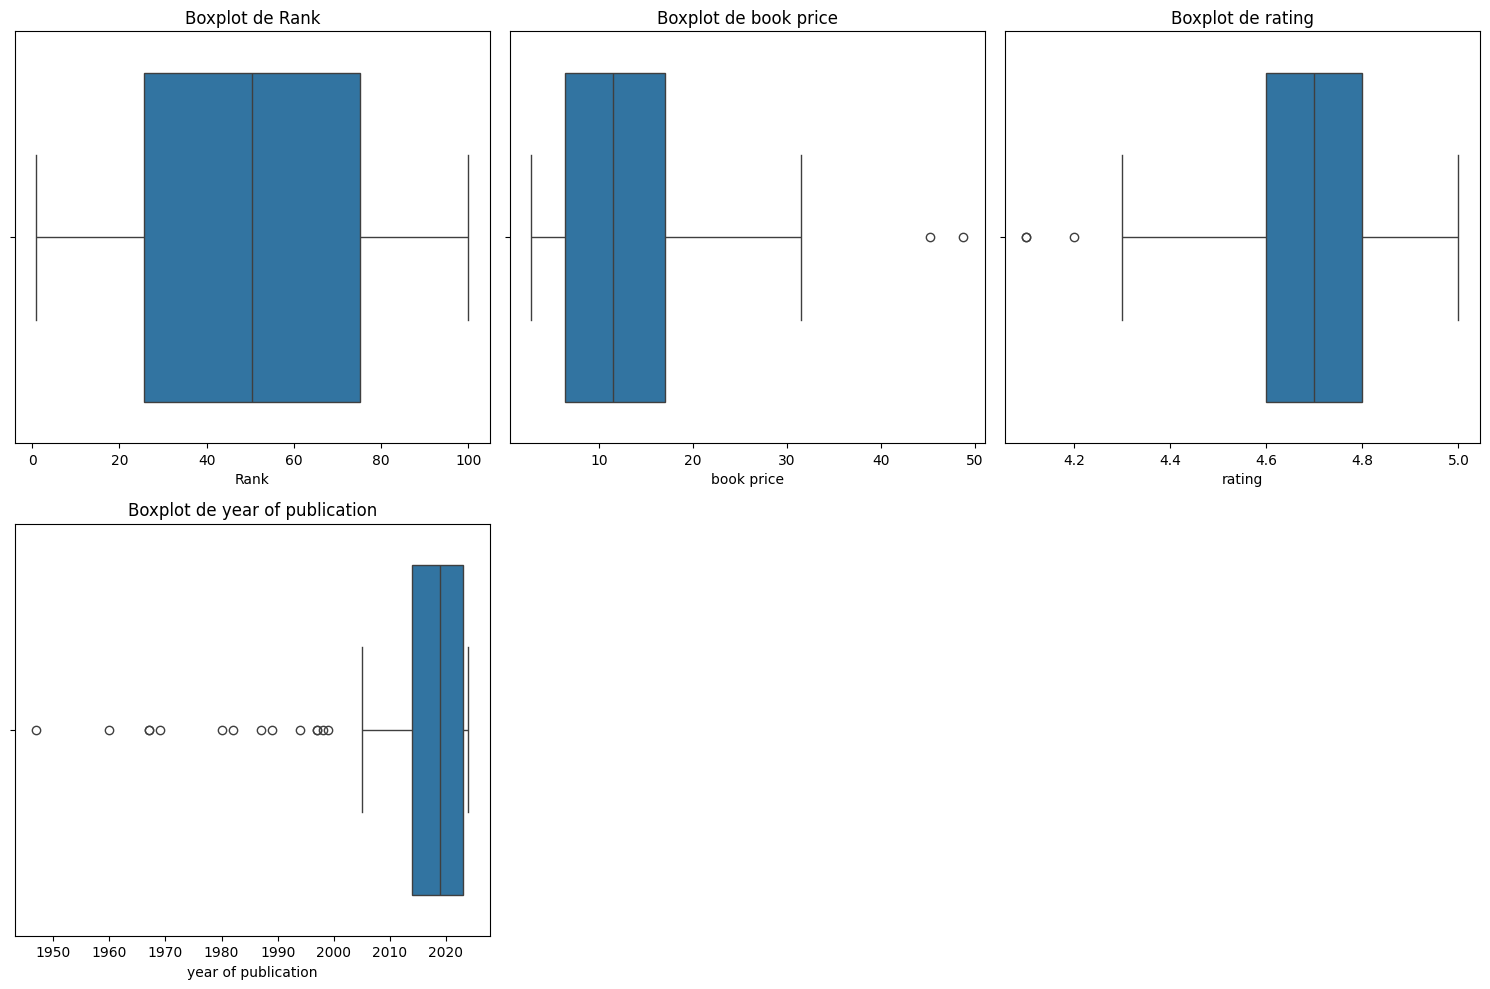

In [9]:
numeric_columns = data_books.select_dtypes(include=['int64', 'float64'])

# Calcular el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5*num_rows))

# Generar y mostrar los diagramas de caja para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=data_books[col])
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()

**No se encontraron outliers importantes en el dataset, los más relevantes tienen que ver con la columna de precios.**

## Analizo el archivo de los comentarios

In [10]:
# Información sobre el dataframe
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sno                 920 non-null    int64 
 1   book name           920 non-null    object
 2   review title        920 non-null    object
 3   reviewer            920 non-null    object
 4   reviewer rating     920 non-null    int64 
 5   review description  920 non-null    object
 6   is_verified         920 non-null    bool  
 7   date                920 non-null    object
 8   timestamp           920 non-null    object
 9   ASIN                920 non-null    object
dtypes: bool(1), int64(2), object(7)
memory usage: 65.7+ KB


In [11]:
#Identifico todas las columnas de mi dataframe
data_reviews.columns

Index(['Sno', 'book name', 'review title', 'reviewer', 'reviewer rating',
       'review description', 'is_verified', 'date', 'timestamp', 'ASIN'],
      dtype='object')

In [12]:
#Describo los tipos de datos
data_reviews.dtypes

,0
Sno,int64
book name,object
review title,object
reviewer,object
reviewer rating,int64
review description,object
is_verified,bool
date,object
timestamp,object
ASIN,object


In [13]:
data_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,920.0,459.500000,265.725422,0.0,229.75,459.5,689.25,919.0
reviewer rating,920.0,4.826087,0.432839,2.0,5.00,5.0,5.00,5.0


# **Limpieza y transformación de datos**

### Datos Duplicados

In [14]:
#Controlo si existen datos duplicados
data_reviews.duplicated().sum()

0

**El dataframe que contiene los datos de los libros no posee datos duplicados.**

### Datos Nulos

In [15]:
#Controlo si existe valores nullos
data_reviews.isnull().sum()

,0
Sno,0
book name,0
review title,0
reviewer,0
reviewer rating,0
review description,0
is_verified,0
date,0
timestamp,0
ASIN,0


**El dataframe de libros no posee datos nulos.**

## **Valores outliers**

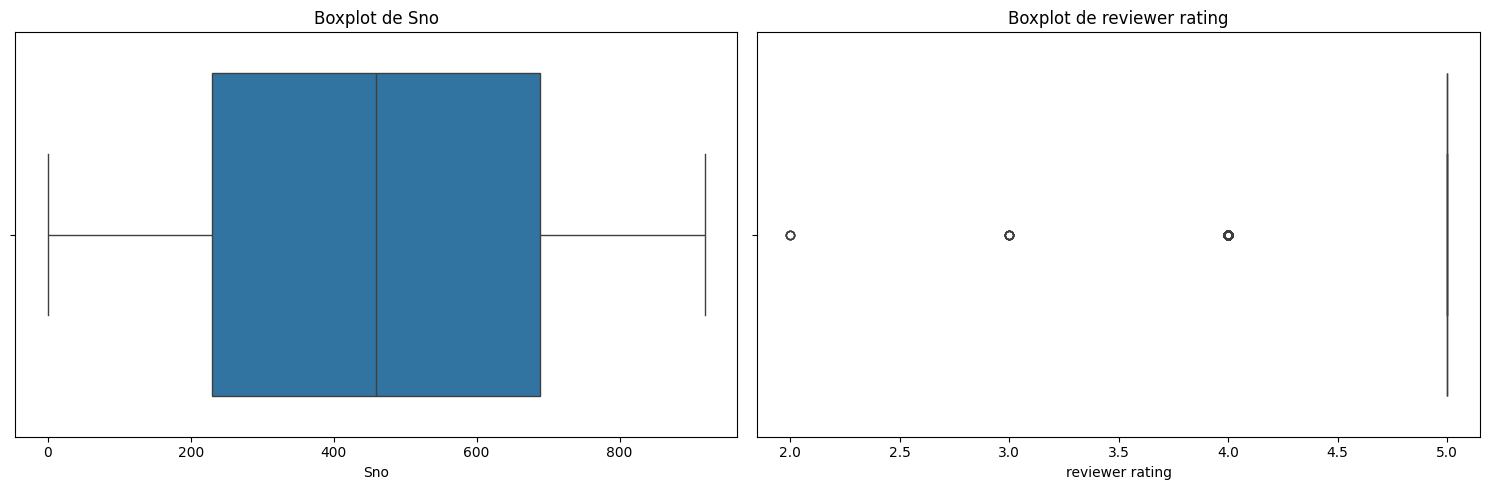

In [16]:
numeric_columns = data_reviews.select_dtypes(include=['int64', 'float64'])

# Calcular el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5*num_rows))

# Generar y mostrar los diagramas de caja para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=data_reviews[col])
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()

**No se encontraron outliers importantes en el dataset, los más relevantes tienen que ver con la columna de precios.**

# Análisis Exploratorio

## Analizo el archivo de los libros

In [17]:
data_books

,Rank,book title,book price,rating,author,year of publication,genre,url
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,amazon.com/Friends-Lovers-Big-Terrible-Thing/d...
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...
...,...,...,...,...,...,...,...,...
95,96,First Little Readers Parent Pack: Guided Readi...,11.40,4.7,Deborah Schecter,2010,Nonfiction,amazon.com/First-Little-Readers-Parent-Pack/dp...
96,97,Hatchet,5.14,4.7,Gary Paulsen,1987,"young adult novel, adventure novel, survival ...",amazon.com/Hatchet-Gary-Paulsen/dp/1416936475/...
97,98,"The Wager: A Tale of Shipwreck, Mutiny and Murder",15.30,4.5,David Grann,2023,Nonfiction,amazon.com/Wager-Tale-Shipwreck-Mutiny-Murder/...
98,99,"I'm Dead, Now What?: Important Information Abo...",12.99,4.6,Peter Pauper Press,2015,Nonfiction,amazon.com/Important-Information-Belongings-Bu...


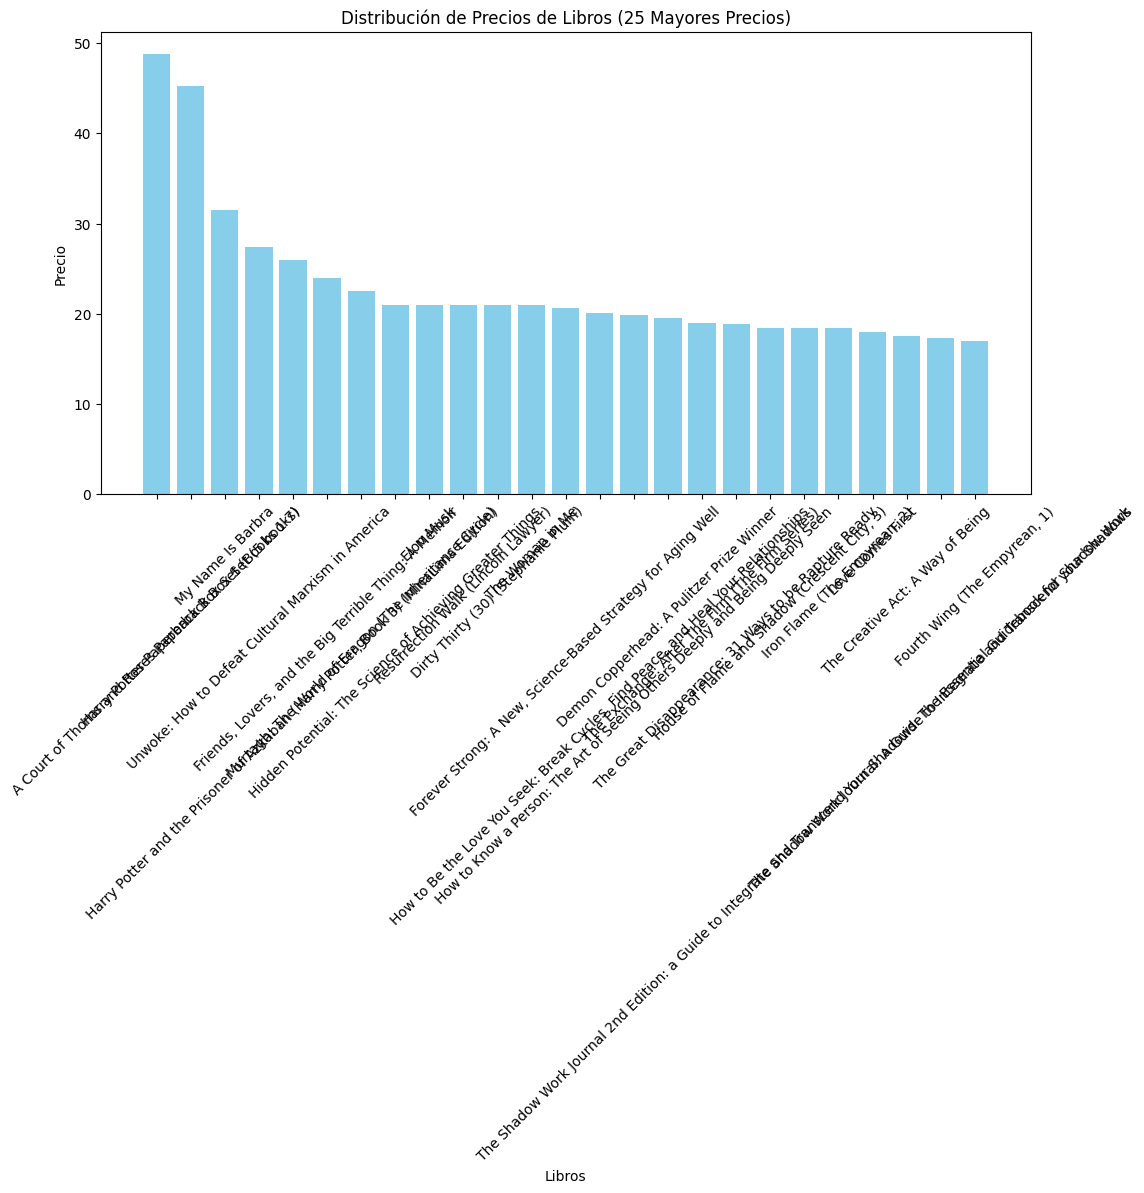

In [18]:
# Distribución de precios de libros
df_top_prices = data_books.nlargest(25, 'book price')

plt.figure(figsize=(12, 6))
plt.bar(df_top_prices['book title'], df_top_prices['book price'], color='skyblue')
plt.title('Distribución de Precios de Libros (25 Mayores Precios)')
plt.xlabel('Libros')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()



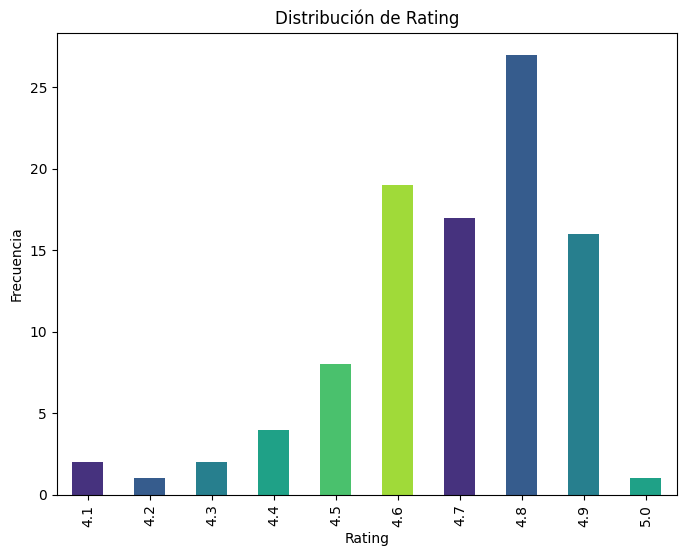

In [19]:
# Gráfico de barras para la Distribución de Rating
cat_counts = data_books['rating'].value_counts().sort_index()

# Creo el gráfico de barras
plt.figure(figsize=(8, 6))
cat_counts.plot.bar(color=sns.color_palette('viridis'))
plt.title('Distribución de Rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

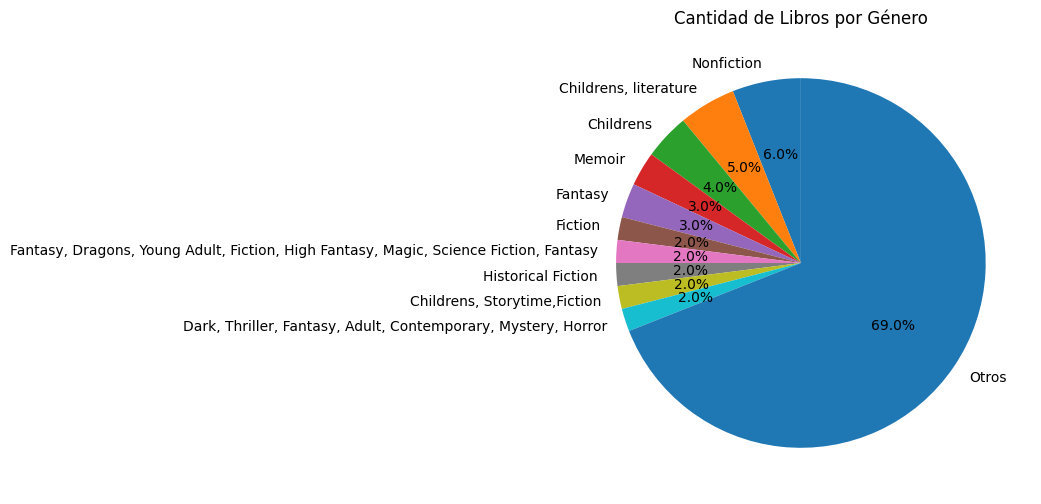

In [20]:
# Cantidad de libros por género
genre_counts = data_books['genre'].value_counts()
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Separar géneros mayores al 2% y agrupar el resto como 'Otros'
filtered_genres = genre_percentages[genre_percentages >=1.5]
others = genre_percentages[genre_percentages <= 1.5].sum()

# Añadir la categoría 'Otros'
filtered_genres['Otros'] = others

# Graficar
filtered_genres.plot(kind='pie', figsize=(8, 6), autopct='%1.1f%%', startangle=90)
plt.title('Cantidad de Libros por Género')
plt.ylabel('')  # Elimina el ylabel por estética
plt.show()


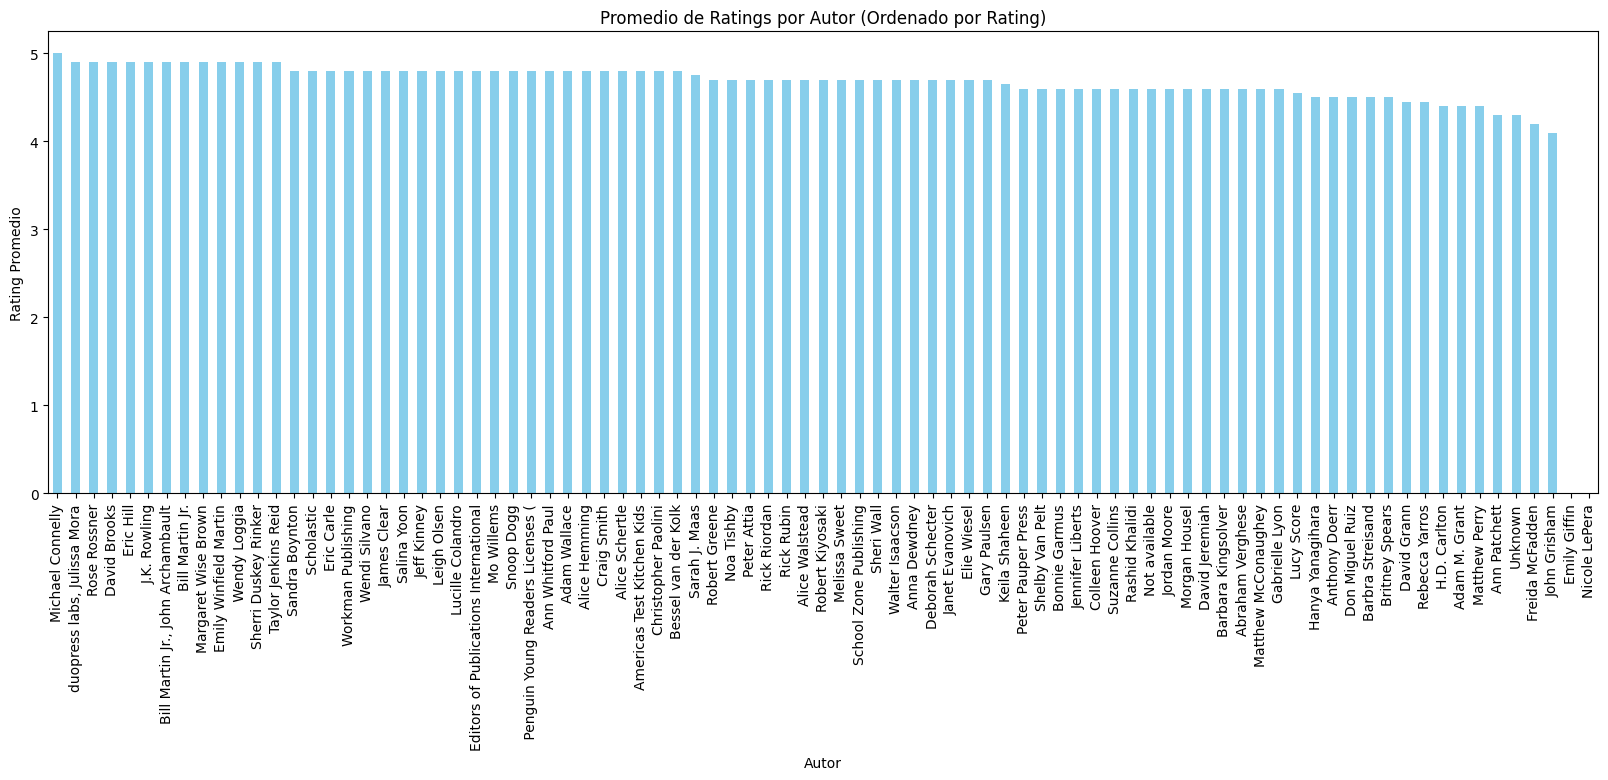

In [21]:
# Calcular el promedio de ratings por autor y ordenarlos por rating
rating_by_author = data_books.groupby('author')['rating'].mean().sort_values(ascending=False)

rating_by_author.plot(kind='bar', figsize=(20, 6), color='skyblue')
plt.title('Promedio de Ratings por Autor (Ordenado por Rating)')
plt.xlabel('Autor')
plt.ylabel('Rating Promedio')
plt.show()


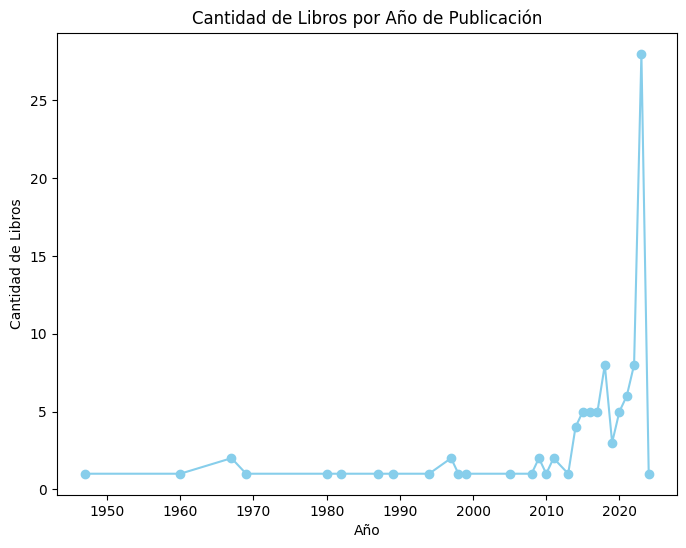

In [22]:
# Cantidad de libros por año de publicación
books_per_year = data_books['year of publication'].value_counts().sort_index()
books_per_year.plot(kind='line', marker='o', figsize=(8, 6), color='skyblue')
plt.title('Cantidad de Libros por Año de Publicación')
plt.xlabel('Año')
plt.ylabel('Cantidad de Libros')
plt.show()

## Analizo el archivo con los comentarios

In [23]:
data_reviews.columns

Index(['Sno', 'book name', 'review title', 'reviewer', 'reviewer rating',
       'review description', 'is_verified', 'date', 'timestamp', 'ASIN'],
      dtype='object')

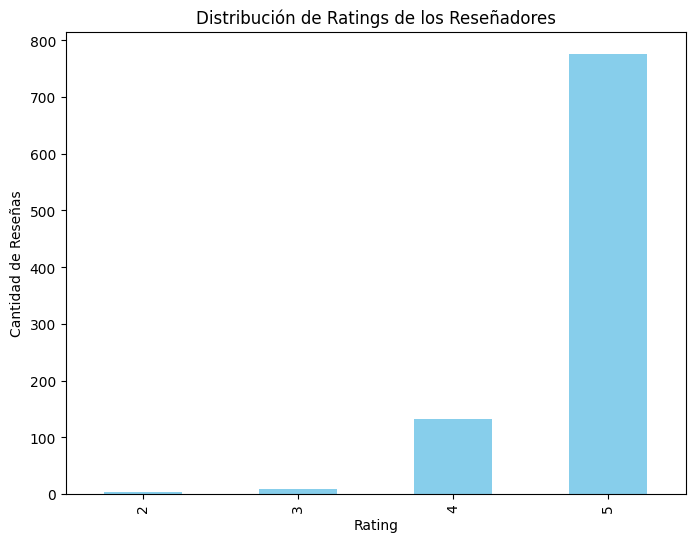

In [24]:
# Distribución de Ratings de los Reseñadores
plt.figure(figsize=(8, 6))
data_reviews['reviewer rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de Ratings de los Reseñadores')
plt.xlabel('Rating')
plt.ylabel('Cantidad de Reseñas')
plt.show()

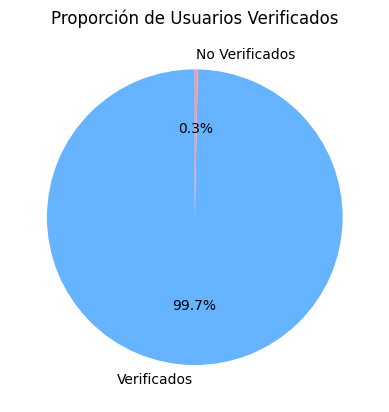

In [26]:
# Proporción de Usuarios Verificados
verified_counts = data_reviews['is_verified'].value_counts()
verified_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Verificados', 'No Verificados'], colors=['#66b3ff', '#ff9999'])
plt.title('Proporción de Usuarios Verificados')
plt.ylabel('')
plt.show()

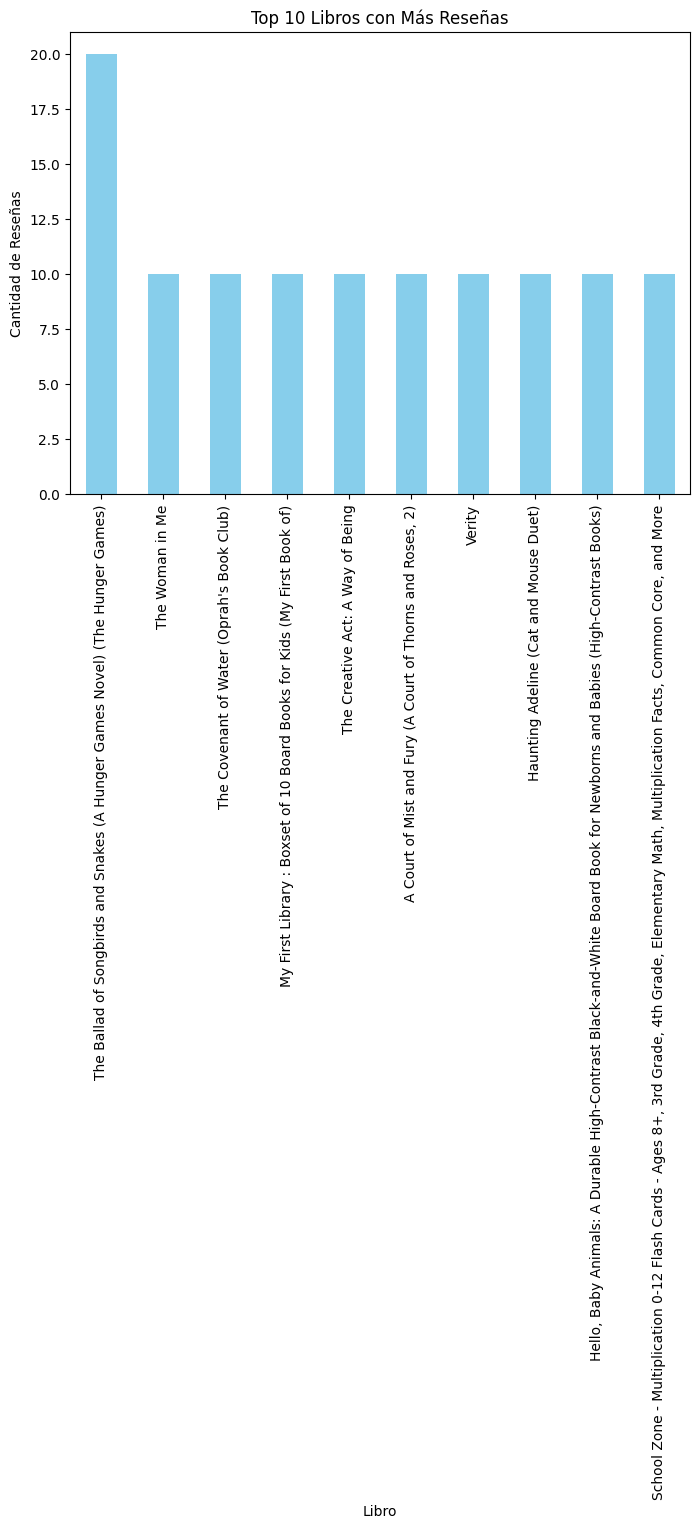

In [27]:
# Top 10 Libros con Más Reseñas
top_books = data_reviews['book name'].value_counts().head(10)
plt.figure(figsize=(8, 6))
top_books.plot(kind='bar', color='skyblue')
plt.title('Top 10 Libros con Más Reseñas')
plt.xlabel('Libro')
plt.ylabel('Cantidad de Reseñas')
plt.show()

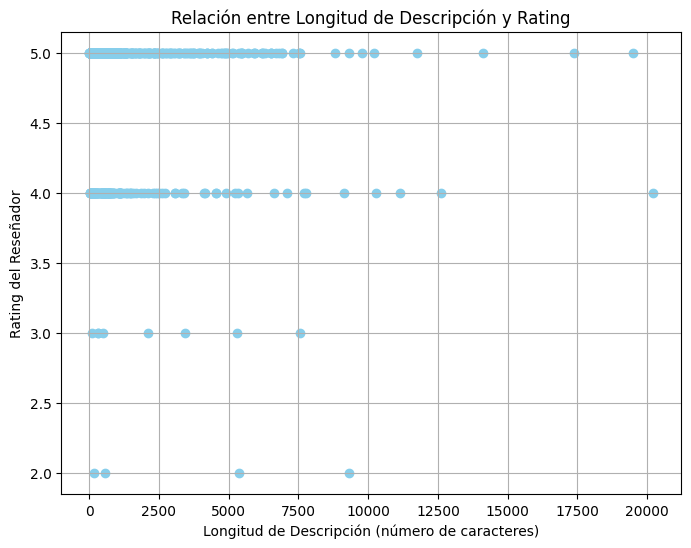

In [28]:
# Relación entre Calificación y Longitud de Descripción
data_reviews['description_length'] = data_reviews['review description'].apply(len)
plt.figure(figsize=(8, 6))
plt.scatter(data_reviews['description_length'], data_reviews['reviewer rating'], color='skyblue')
plt.title('Relación entre Longitud de Descripción y Rating')
plt.xlabel('Longitud de Descripción (número de caracteres)')
plt.ylabel('Rating del Reseñador')
plt.grid()
plt.show()

## Modelos

In [29]:
data_reviews

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN,description_length
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048,3060
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048,1530
2,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048,4204
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048,2941
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048,1790
...,...,...,...,...,...,...,...,...,...,...,...
915,915,The Wonky Donkey,The best child/grandmother book ever written,Marilyn Kreienkamp,5,This is exactly the kind of book children unde...,True,02-11-2023,"Reviewed in the United States November 2, 2023",545261244,141
916,916,The Wonky Donkey,Great book,Amazon Customer,5,We get this book for all our grandchildren the...,True,30-10-2023,"Reviewed in the United States October 30, 2023",545261244,125
917,917,The Wonky Donkey,"Fun book, makes you laugh",Jennifer Tinucci,5,I saw a grandma reading this book to her grand...,True,24-10-2023,"Reviewed in the United States October 24, 2023",545261244,168
918,918,The Wonky Donkey,Cutest beck ever!!,Janice Easter,5,I have ordered this book over and over to give...,True,19-10-2023,"Reviewed in the United States October 19, 2023",545261244,223


#Análisis del Texto

## Libreria NLTK

In [30]:
data_reviews

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN,description_length
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048,3060
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048,1530
2,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048,4204
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048,2941
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048,1790
...,...,...,...,...,...,...,...,...,...,...,...
915,915,The Wonky Donkey,The best child/grandmother book ever written,Marilyn Kreienkamp,5,This is exactly the kind of book children unde...,True,02-11-2023,"Reviewed in the United States November 2, 2023",545261244,141
916,916,The Wonky Donkey,Great book,Amazon Customer,5,We get this book for all our grandchildren the...,True,30-10-2023,"Reviewed in the United States October 30, 2023",545261244,125
917,917,The Wonky Donkey,"Fun book, makes you laugh",Jennifer Tinucci,5,I saw a grandma reading this book to her grand...,True,24-10-2023,"Reviewed in the United States October 24, 2023",545261244,168
918,918,The Wonky Donkey,Cutest beck ever!!,Janice Easter,5,I have ordered this book over and over to give...,True,19-10-2023,"Reviewed in the United States October 19, 2023",545261244,223


In [31]:
!pip install nltk

In [32]:
import pandas as pd
import seaborn as sns
import nltk
import itertools
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [33]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
import re
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [34]:
#nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
%%capture
from nltk.corpus import stopwords
stopwords.words('english')

In [36]:
wordnet_lemmatizer = WordNetLemmatizer()

In [37]:
stopwords = nltk.corpus.stopwords.words('english')

In [38]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [39]:
# Agregar nuevas palabras a la lista de stopwords
new_stopwords = ''
stopwords.append(new_stopwords)

# Ahora, 'stop_words' contiene las stopwords originales más las nuevas que agregaste
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [40]:
from gensim.models import Word2Vec
from gensim.parsing.preprocessing import strip_punctuation, strip_numeric, strip_short, stem_text

In [41]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [42]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [43]:
# Lista para guardar los comentarios procesados
reviews_list=[]

# Loop para procesar cada comentario en la columna 'Comentario' del DataFrame df
for reviews in data_reviews['review description']:
    # Eliminar todos los caracteres no alfabéticos excepto espacios
    reviews = re.sub("[^a-zA-Z]"," ", str(reviews))
    # Eliminar URLs
    reviews = re.sub(r'http\S+|www\S+|https\S+', '', reviews, flags=re.MULTILINE)
    # Eliminar menciones y hashtags
    reviews = re.sub(r'\@\w+|\#\w+', '', reviews)
    # Eliminar palabras cortas de menos de 2 letras
    reviews = strip_short(reviews,minsize=2)
    # Convertir el texto a minúsculas
    reviews = reviews.lower()
    # Eliminar puntuación
    reviews = strip_punctuation(reviews)
    # Eliminar números
    reviews = strip_numeric(reviews)
    # Tokenizar el comentario
    reviews = word_tokenize(reviews)
    # Lematizar cada palabra
    review_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in reviews]
    # Filtrar palabras para mantener solo aquellas con más de 3 letras
    reviews = [palabra for palabra in reviews if len(palabra)>3 ]
    # Filtrar palabras para excluir stopwords
    reviews = [palabra for palabra in reviews if not palabra in stopwords]
     # Unir las palabras filtradas en una cadena de texto
    reviews = " ".join(reviews)
    # Agregar el comentario procesado a la lista
    reviews_list.append(reviews)

In [44]:
reviews_list

['third shipped lightening fast print quality book good like rose purple foil captured taste look bomb bookshelf writing good amazing painted incredible picture life much better writing thought honest expecting scattered blurbs throughout book presented honor experience sounds like extent think ghost writer went verbose areas unnecessary derailed voice head imagine getting whole picture would difficult hoping thicker book disappointed nevertheless interesting read thus britney life story smart starting lineage hold back keeping family accountable gate good conviction suddenly found understanding little quirks connecting dots certain things would suddenly click head example british accent relationship lynchpin matriarch elder cool build laying ground work future decisions presenting complex childhood family dynamics really understanding choices quirks much better ever realized needed deep thought sometimes judge place pity outsider perspective instead compassion soft gentle feminine sid

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [46]:
newlist = [x for x in reviews_list if x != '']
newlist2 = " ".join(newlist)

## Nube de palabras de todos los comentarios

mkdir: cannot create directory ‘/content/Analisis’: File exists


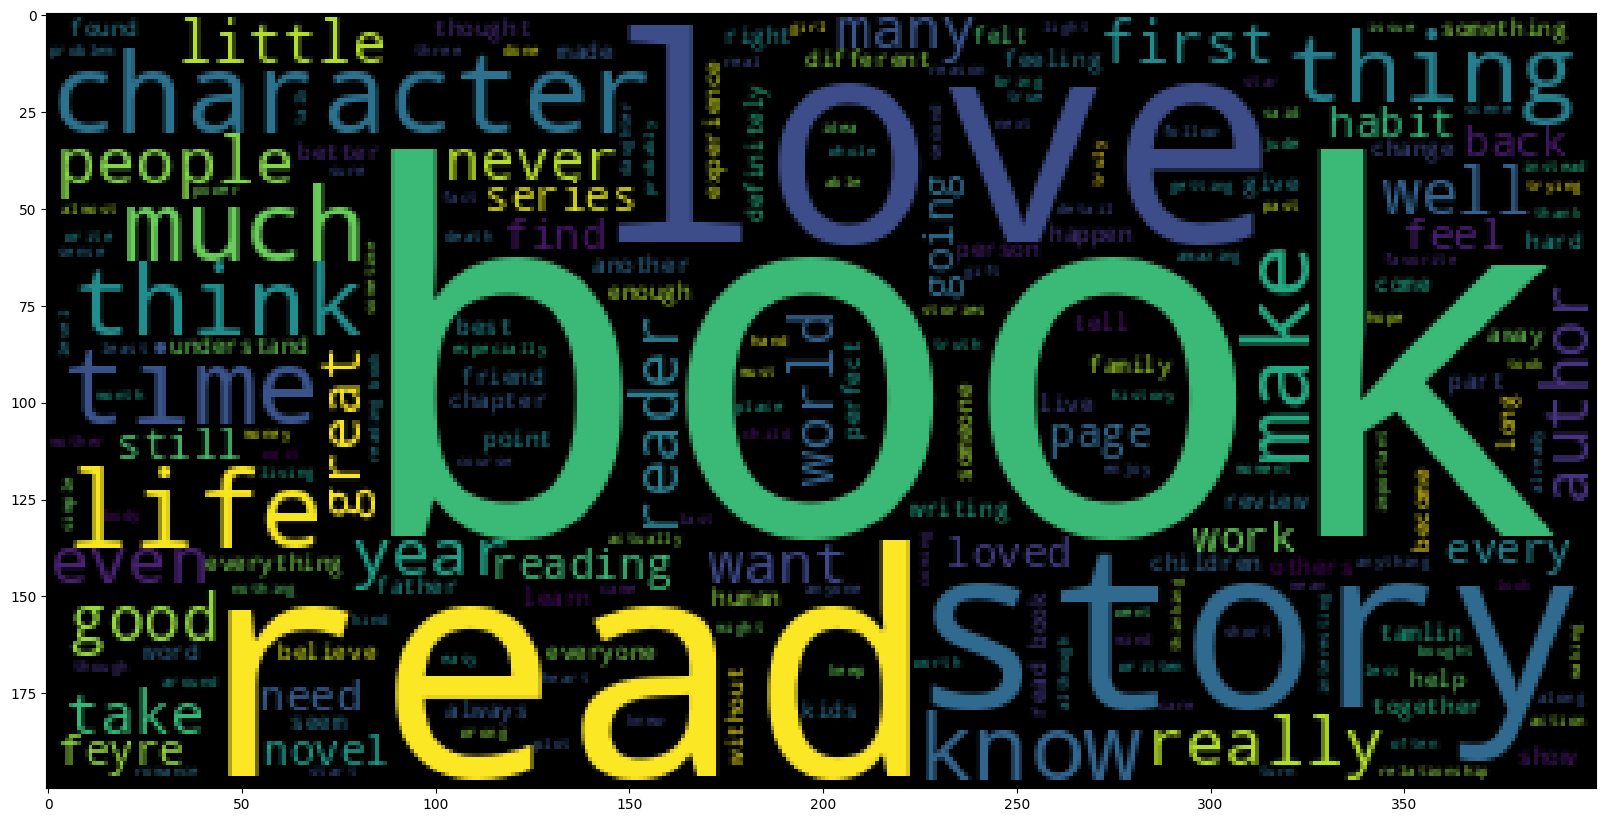

In [47]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(newlist2))
plt.savefig("Grafico_Nube_Palabras.jpg")
!mkdir "/content/Analisis"
!mv "Grafico_Nube_Palabras.jpg" "/content/Analisis"

## Nube de palabras de comentarios negativos y positivos

Creo una nube de palabras teniendo en cuenta los comentarios de los usuarios negativos y los positivos. Para esto voy a utilizar la librería de spacy.

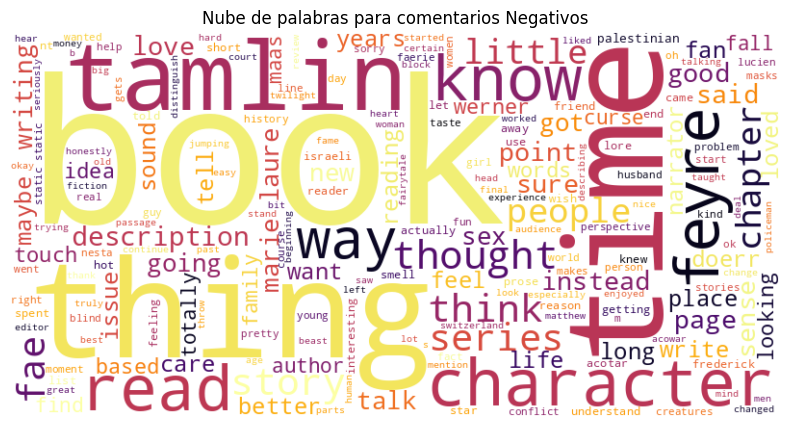

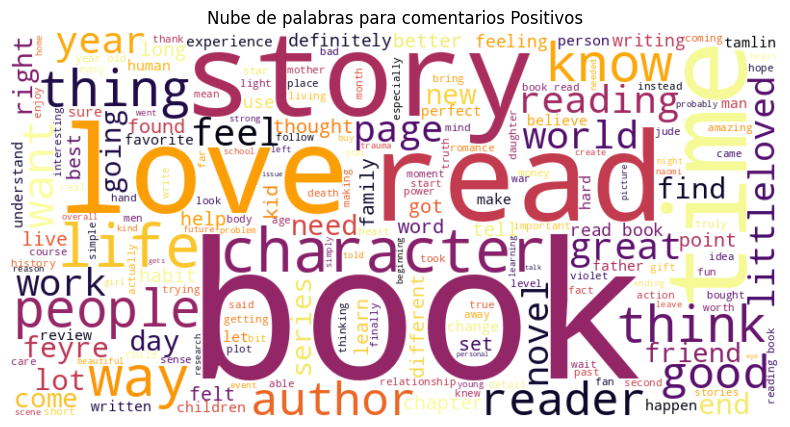

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy

# Cargar el modelo de spaCy
nlp = spacy.load("en_core_web_sm")

# Filtrar los comentarios por su longitud y calificación
comentarios_negativos = data_reviews[data_reviews['reviewer rating'] <= 3]
comentarios_positivos = data_reviews[data_reviews['reviewer rating'] >= 4]

# Función para generar una nube de palabras
def generar_nube_de_palabras(comentarios, columna_texto, titulo):
    # Concatenar todos los textos de la columna seleccionada
    texto_completo = ' '.join(comentarios[columna_texto].dropna().tolist())

    # Procesar el texto con spaCy
    doc = nlp(texto_completo)

    # Filtrar palabras irrelevantes (stop words, puntuaciones)
    palabras = [
        token.text.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and token.text.lower() not in ('y', 'e', 'de', 'por')
    ]

    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="inferno").generate(' '.join(palabras))

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

# Generar y mostrar las nubes de palabras para las descripciones de comentarios
generar_nube_de_palabras(comentarios_negativos, 'review description', 'Nube de palabras para comentarios Negativos')
generar_nube_de_palabras(comentarios_positivos, 'review description', 'Nube de palabras para comentarios Positivos')


# Sentiment Analysis

In [49]:
# Libreria TextBlob
from textblob import TextBlob

**Polarity:** Es un valor flotante dentro del rango [-1.0, 1.0] donde -1.0 indica una emoción negativa muy fuerte y 1.0 indica una emoción positiva muy fuerte. Cero indica neutralidad.

* -1.0: Muy negativo
* -0.5: Negativo
* 0.0: Neutral
* +0.5: Positivo
* +1.0: Muy positivo

**Subjectivity:** Es un valor flotante dentro del rango [0.0, 1.0] donde 0.0 es muy objetivo y 1.0 es muy subjetivo. Las oraciones subjetivas generalmente se refieren a opinión, emoción o juicio mientras que las oraciones objetivas se refieren a hechos informativos.

In [50]:
# Crear un nuevo dataframe seleccionando los campos requeridos
data_sentiment = data_reviews[['book name', 'review title', 'reviewer', 'reviewer rating', 'review description', 'is_verified']].copy()

# Renombrar las columnas para que coincidan con los nombres deseados
data_sentiment.rename(columns={
    'book name': 'book_name',
    'review title': 'review_title',
    'review description': 'text',
    'is_verified': 'is_verified'
}, inplace=True)

# Calcular polaridad y subjetividad usando TextBlob
def analizar_sentimiento(texto):
    if pd.notnull(texto):  # Verifica si el texto no es nulo
        blob = TextBlob(texto)
        return blob.sentiment.polarity, blob.sentiment.subjectivity
    return 0, 0  # Por defecto, asignar 0 si el texto es nulo

data_sentiment[['polarity', 'subjectivity']] = data_sentiment['text'].apply(
    lambda x: pd.Series(analizar_sentimiento(x))
)

# Mostrar el dataframe final
print(data_sentiment.head())


         book_name                                       review_title  \
0  The Woman in Me   Unbelievably impressive. Her torn life on paper.   
1  The Woman in Me                         What a heartbreaking story   
2  The Woman in Me  Britney you are so invincible! You are an insp...   
3  The Woman in Me                               Fast Read, Sad Story   
4  The Woman in Me                       Buy it, it’s worth the read!   

           reviewer  reviewer rating  \
0  Murderess Marbie                4   
1               L J                5   
2             Jamie                5   
3               KMG                5   
4   Stephanie Brown                5   

                                                text  is_verified  polarity  \
0  I'm only a third way in. Shipped lightening fa...         True  0.206535   
1  "There have been so many times when I was scar...         True -0.178852   
2  The media could not be loaded. I personally ha...         True  0.032132   
3  I

In [51]:
# Función para clasificar la polaridad
def describir_polaridad(score):
    if score <= 1 and score >= 0.5:
        return "Very positive"
    elif score < 0.5 and score > 0:
        return "Quite positive"
    elif score == 0:
        return "Neutral"
    elif score >= -1 and score <= -0.5:
        return "Very negative"
    else:
        return "Quite negative"

# Función para clasificar la subjetividad
def describir_subjetividad(score):
    if score >= 0.75:
        return "Very subjective"
    elif score >= 0.5:
        return "Quite subjective"
    elif score >= 0.25:
        return "Quite objective"
    else:
        return "Very objective"

# Crear las nuevas columnas en el dataframe
data_sentiment['polarity_desc'] = data_sentiment['polarity'].apply(describir_polaridad)
data_sentiment['subjectivity_desc'] = data_sentiment['subjectivity'].apply(describir_subjetividad)

# Mostrar las primeras filas del dataframe actualizado
print(data_sentiment.head())


         book_name                                       review_title  \
0  The Woman in Me   Unbelievably impressive. Her torn life on paper.   
1  The Woman in Me                         What a heartbreaking story   
2  The Woman in Me  Britney you are so invincible! You are an insp...   
3  The Woman in Me                               Fast Read, Sad Story   
4  The Woman in Me                       Buy it, it’s worth the read!   

           reviewer  reviewer rating  \
0  Murderess Marbie                4   
1               L J                5   
2             Jamie                5   
3               KMG                5   
4   Stephanie Brown                5   

                                                text  is_verified  polarity  \
0  I'm only a third way in. Shipped lightening fa...         True  0.206535   
1  "There have been so many times when I was scar...         True -0.178852   
2  The media could not be loaded. I personally ha...         True  0.032132   
3  I

In [52]:
# Crear el nuevo campo 'comentario' basado en la columna 'polarity'
data_sentiment['comentario'] = data_sentiment['polarity'].apply(lambda x: 1 if x > 0 else 0)

In [53]:
data_sentiment

,book_name,review_title,reviewer,reviewer rating,text,is_verified,polarity,subjectivity,polarity_desc,subjectivity_desc,comentario
0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,0.206535,0.526866,Quite positive,Quite subjective,1
1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,-0.178852,0.445123,Quite negative,Quite objective,0
2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,0.032132,0.519594,Quite positive,Quite subjective,1
3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,0.078542,0.527054,Quite positive,Quite subjective,1
4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,0.153413,0.609484,Quite positive,Quite subjective,1
...,...,...,...,...,...,...,...,...,...,...,...
915,The Wonky Donkey,The best child/grandmother book ever written,Marilyn Kreienkamp,5,This is exactly the kind of book children unde...,True,0.372619,0.514286,Quite positive,Quite subjective,1
916,The Wonky Donkey,Great book,Amazon Customer,5,We get this book for all our grandchildren the...,True,0.275000,0.350000,Quite positive,Quite objective,1
917,The Wonky Donkey,"Fun book, makes you laugh",Jennifer Tinucci,5,I saw a grandma reading this book to her grand...,True,0.412500,0.775000,Quite positive,Very subjective,1
918,The Wonky Donkey,Cutest beck ever!!,Janice Easter,5,I have ordered this book over and over to give...,True,0.340000,0.535000,Quite positive,Quite subjective,1


## Calculo el campo texto procesado

In [54]:
def get_wordnet_pos(word):
    from nltk.corpus import wordnet
    tag = wordnet.synsets(word)
    if tag:
        tag = tag[0].pos()
        if tag in ['a', 'r', 'n', 'v']:
            return tag
    return wordnet.NOUN

# Crear el campo texto_procesado
def procesar_texto(reviews):
    # Eliminar todos los caracteres no alfabéticos excepto espacios
    reviews = re.sub("[^a-zA-Z]"," ", str(reviews))
    # Eliminar URLs
    reviews = re.sub(r'http\S+|www\S+|https\S+', '', reviews, flags=re.MULTILINE)
    # Eliminar menciones y hashtags
    reviews = re.sub(r'\@\w+|\#\w+', '', reviews)
    # Eliminar palabras cortas de menos de 2 letras
    reviews = strip_short(reviews, minsize=2)
    # Convertir el texto a minúsculas
    reviews = reviews.lower()
    # Eliminar puntuación
    reviews = strip_punctuation(reviews)
    # Eliminar números
    reviews = strip_numeric(reviews)
    # Tokenizar el comentario
    reviews = word_tokenize(reviews)
    # Lematizar cada palabra
    review_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in reviews]
    # Filtrar palabras para mantener solo aquellas con más de 3 letras
    reviews = [palabra for palabra in review_lemma if len(palabra) > 3]
    # Filtrar palabras para excluir stopwords
    reviews = [palabra for palabra in reviews if not palabra in stopwords]
    # Unir las palabras filtradas en una cadena de texto
    reviews = " ".join(reviews)
    return reviews

# Aplicar la función a la columna 'text' y crear la nueva columna
data_sentiment['texto_procesado'] = data_sentiment['text'].apply(procesar_texto)


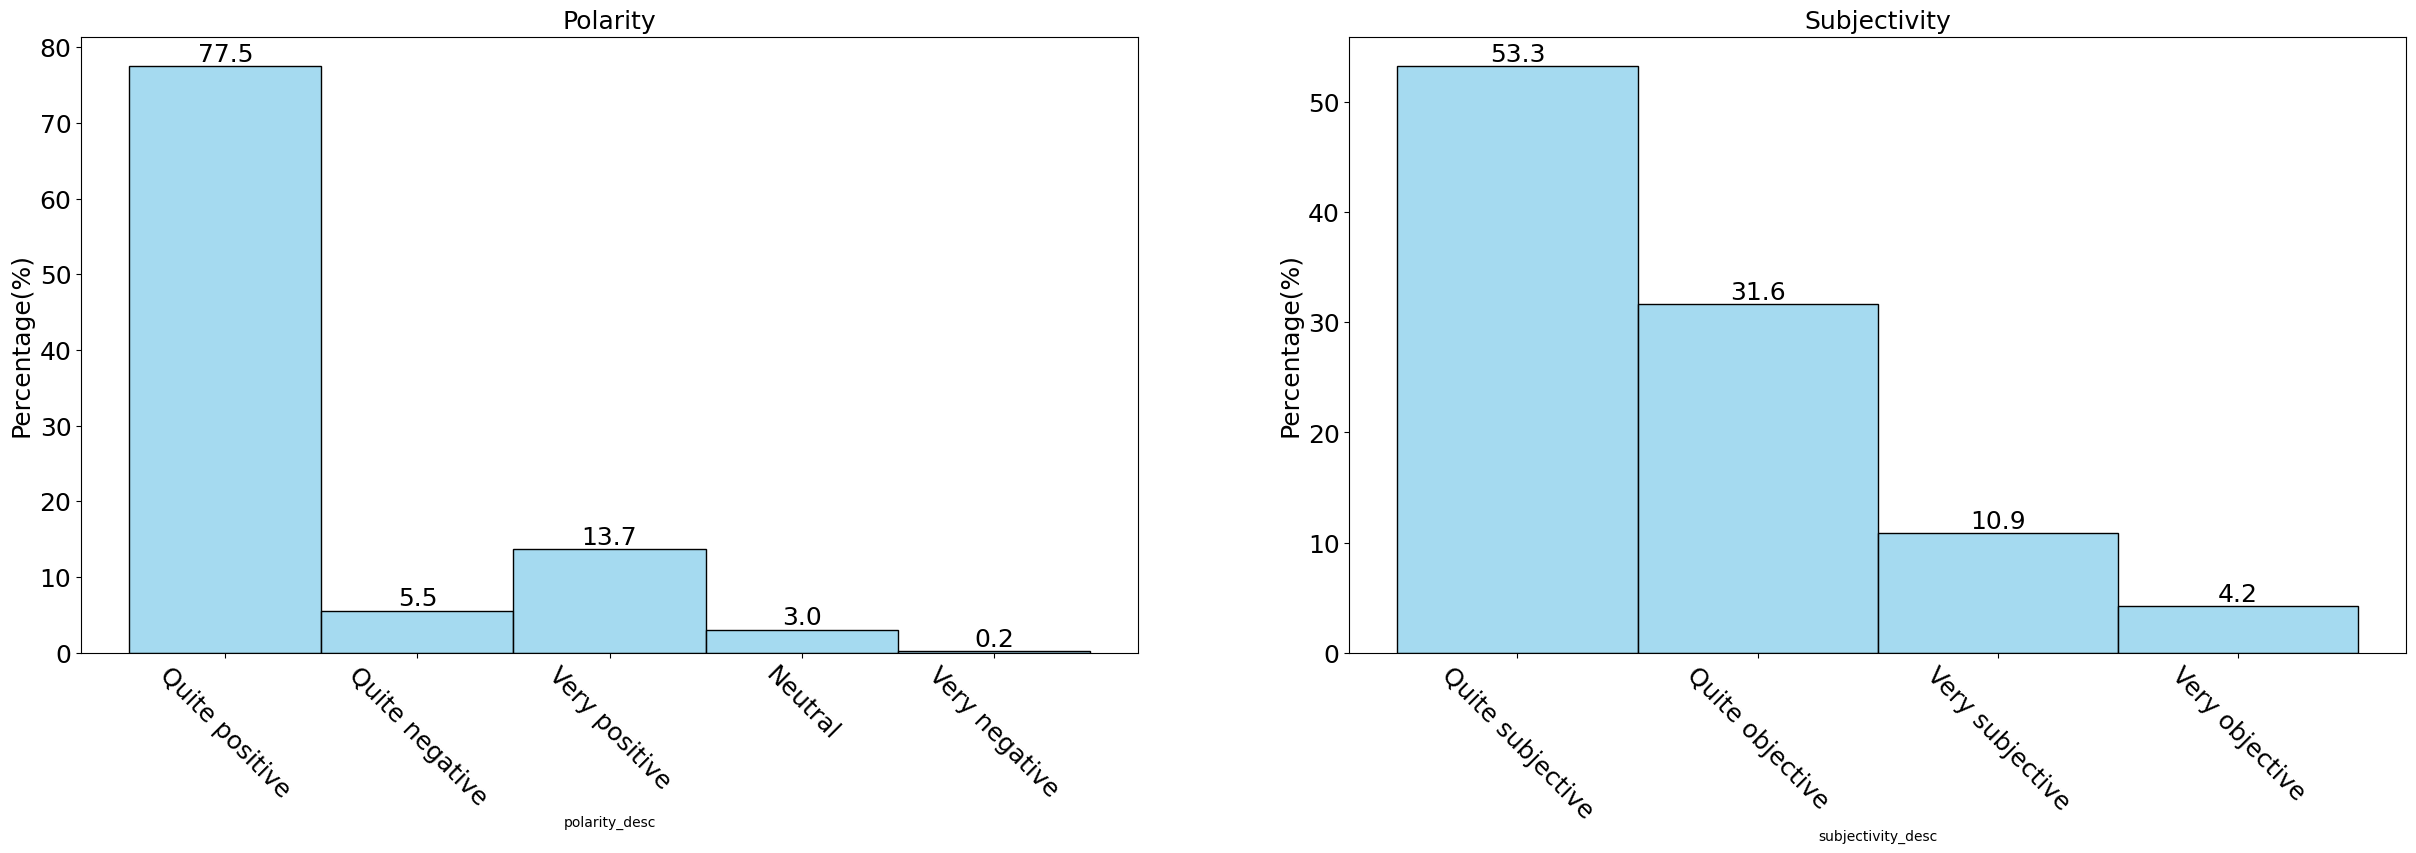

In [55]:
fig, axes = plt.subplots(1,2, figsize=(30,8))


ax1 = sns.histplot(data_sentiment['polarity_desc'],stat="percent",color='skyblue', ax = axes[0])
axes[0].set_title('Polarity', fontsize=18)

ax2 = sns.histplot(data_sentiment['subjectivity_desc'], stat="percent", color='skyblue', ax = axes[1])
axes[1].set_title('Subjectivity',fontsize=18 )

for ax in axes:
    ax.tick_params(axis='x', labelsize=18, rotation = -45)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_ylabel("Percentage(%)", fontsize = 18)
    ax.bar_label(ax.containers[0], fontsize=18, fmt='%.1f')

## Creo Modelos

### Modelo LogisticRegression

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
modelos = pd.DataFrame(columns=['modelo', 'accuracy'])

In [58]:
X = data_sentiment['texto_procesado']
y = data_sentiment['comentario']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
# Utilizo CountVectorizer para transformar el texto en números
vectorizer = CountVectorizer()

# Ajustar y transformar los datos de entrenamiento
X_train_vectors = vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
X_test_vectors = vectorizer.transform(X_test)


In [61]:
# Entreno el modelo Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_vectors, y_train)

# Evaluao el modelo
y_pred = model.predict(X_test_vectors)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

modelos.loc[len(modelos)] = ['LogisticRegression', accuracy]


Precisión del modelo: 0.91

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.33      0.06      0.11        16
           1       0.92      0.99      0.95       168

    accuracy                           0.91       184
   macro avg       0.63      0.53      0.53       184
weighted avg       0.87      0.91      0.88       184


Matriz de confusión:
[[  1  15]
 [  2 166]]


In [63]:
# Pruebo modelo
nuevo_comentario = ["The plot was engaging and characters well developed"]
nuevo_comentario_vector = vectorizer.transform(nuevo_comentario)
prediccion = model.predict(nuevo_comentario_vector)
print("\nPredicción para el nuevo comentario:")
print("Comentario positivo" if prediccion[0] == 1 else "Comentario negativo")


Predicción para el nuevo comentario:
Comentario positivo


### Modelo Naive Bayes

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [65]:
model = MultinomialNB()
model.fit(X_train_vectors, y_train)

MultinomialNB()

In [66]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_vectors)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar un reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

modelos.loc[len(modelos)] = ['Naive_bayes', accuracy]

Precisión del modelo: 0.91
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.91      1.00      0.95       168

    accuracy                           0.91       184
   macro avg       0.46      0.50      0.48       184
weighted avg       0.83      0.91      0.87       184


Matriz de confusión:
[[  0  16]
 [  0 168]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
# Pruebo modelo
nuevo_comentario = ["This book is amazing and insightful"]
nuevo_comentario_vector = vectorizer.transform(nuevo_comentario)
prediccion = model.predict(nuevo_comentario_vector)
print("Comentario positivo" if prediccion[0] == 1 else "Comentario negativo")


Comentario positivo


# Conclusiones


In [68]:
modelos

,modelo,accuracy
0,LogisticRegression,0.907609
1,Naive_bayes,0.913043


Comparación entre ambos modelos



**Precisión general:**

Ambos modelos tienen la misma precisión general (0.91). Esto ocurre porque clasifican correctamente casi todos los positivos, que dominan el dataset.

Logistic Regression tiene un rendimiento ligeramente mejor, pero aún bajo (recall de 0.06 frente a 0.00 en Naive Bayes).
Ninguno de los modelos maneja bien esta clase debido al desbalance de datos.

Ambos modelos son muy buenos identificando comentarios positivos, con f1-scores de 0.95.

Ambos modelos favorecen la clase positiva debido al desbalance. Logistic Regression tiene un leve mejor desempeño global.


## Anexo I

PyCaret es una biblioteca de Python de código abierto diseñada para simplificar el flujo de trabajo en proyectos de Machine Learning. Se centra en la automatización de tareas comunes como la preparación de datos, la selección y comparación de modelos, el ajuste de hiperparámetros, y la implementación de modelos en producción.

In [94]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.9 MB/s eta 0:00:00
   ━━━

In [69]:
from pycaret.classification import *


clf = setup(
    data=data_pycaret,
    target='comentario',
    session_id=42,
    preprocess=True,
    fold=5,
    text_features=['texto_procesado'],
    verbose=False
)

In [70]:
# Comparar modelos
best_model = compare_models()

# Imprimir el mejor modelo
print(best_model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9131,0.7703,0.9983,0.9142,0.9544,0.0571,0.0951,0.3800
rf,Random Forest Classifier,0.9131,0.5809,0.9983,0.9142,0.9544,0.0571,0.0951,1.1840
et,Extra Trees Classifier,0.9131,0.5513,0.9983,0.9142,0.9544,0.0571,0.0951,1.8300
lr,Logistic Regression,0.9115,0.7719,1.0000,0.9115,0.9537,0.0000,0.0000,2.4040
dummy,Dummy Classifier,0.9115,0.5000,1.0000,0.9115,0.9537,0.0000,0.0000,0.1600
knn,K Neighbors Classifier,0.9099,0.5646,0.9949,0.9139,0.9527,0.0516,0.0871,0.3880
svm,SVM - Linear Kernel,0.9069,0.7186,0.9898,0.9151,0.9509,0.0639,0.0750,0.4000
xgboost,Extreme Gradient Boosting,0.8975,0.7148,0.9779,0.9155,0.9456,0.0684,0.0825,9.4920
gbc,Gradient Boosting Classifier,0.8944,0.5300,0.9779,0.9126,0.9441,0.0214,0.0259,5.3180
lightgbm,Light Gradient Boosting Machine,0.8944,0.7173,0.9745,0.9153,0.9438,0.0602,0.0855,0.5860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=42, solver='auto',
                tol=0.0001)


In [73]:
# Crear predicciones en el conjunto de prueba
predicciones = predict_model(best_model, data=data_pycaret)

# Predecir un nuevo comentario
nuevo_comentario = pd.DataFrame({'texto_procesado': ["The plot was engaging and insightful"]})
prediccion = predict_model(best_model, data=nuevo_comentario)
print(prediccion)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9543,0.7407,1.0000,0.9523,0.9756,0.6288,0.6771


                        texto_procesado  prediction_label
0  The plot was engaging and insightful                 1


El mejor modelo según la librería Pycaret es el modelo Ridge Classifier con los siguientes parámetros:


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=42, solver='auto',
                tol=0.0001)

In [69]:
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [73]:
# Inicializar el modelo RidgeClassifier con los mejores parámetros
model = RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=42, solver='auto',
                tol=0.0001)

# Entrenar el modelo
model.fit(X_train_vectors, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_vectors)

# Evaluar el modelo
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

modelos.loc[len(modelos)] = ['RidgeClassifier', accuracy_score(y_test, y_pred)]


Precisión del modelo: 0.8586956521739131

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.14      0.12      0.13        16
           1       0.92      0.93      0.92       168

    accuracy                           0.86       184
   macro avg       0.53      0.53      0.53       184
weighted avg       0.85      0.86      0.85       184


Matriz de confusión:
[[  2  14]
 [ 12 156]]


In [75]:
modelos

,modelo,accuracy
0,LogisticRegression,0.907609
1,Naive_bayes,0.913043
2,Naive_bayes,<function accuracy_score at 0x7f9fb04f1e10>
3,Naive_bayes,<function accuracy_score at 0x7f9fb04f1e10>
4,RidgeClassifier,0.858696


Al crear el modelo utilizando el modelo RidgeClassifier con los parametros que nos indico la librería pycaret puedo determinar que el resultado de Precisión del modelo es de  0.85 peor que los modelos Naive Bayes y Logistic Regression.

## Anexo II

### Emotion Analysis con HugginFace

In [67]:
# Instalar librerías
!pip install transformers
!pip install timm

In [68]:
from transformers import pipeline

# Cargar el modelo de clasificación de emociones
modelo = pipeline(task="text-classification", model="pysentimiento/robertuito-emotion-analysis")

# Definir una función para analizar emociones
def obtener_emocion(texto):
    try:
        tarea_res = modelo(texto)
        return tarea_res[0]['label']  # Extraer la etiqueta de emoción
    except Exception as e:
        return "Error"  # Retornar "Error" en caso de fallo

# Aplicar la función a la columna 'text' y crear la nueva columna 'emotion'
data_sentiment['emotion'] = data_sentiment['text'].apply(obtener_emocion)

# Mostrar el dataframe actualizado
print(data_sentiment.head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (729 > 128). Running this sequence through the model will result in indexing errors


         book_name                                       review_title  \
0  The Woman in Me   Unbelievably impressive. Her torn life on paper.   
1  The Woman in Me                         What a heartbreaking story   
2  The Woman in Me  Britney you are so invincible! You are an insp...   
3  The Woman in Me                               Fast Read, Sad Story   
4  The Woman in Me                       Buy it, it’s worth the read!   

           reviewer  reviewer rating  \
0  Murderess Marbie                4   
1               L J                5   
2             Jamie                5   
3               KMG                5   
4   Stephanie Brown                5   

                                                text  is_verified  polarity  \
0  I'm only a third way in. Shipped lightening fa...         True  0.206535   
1  "There have been so many times when I was scar...         True -0.178852   
2  The media could not be loaded. I personally ha...         True  0.032132   
3  I

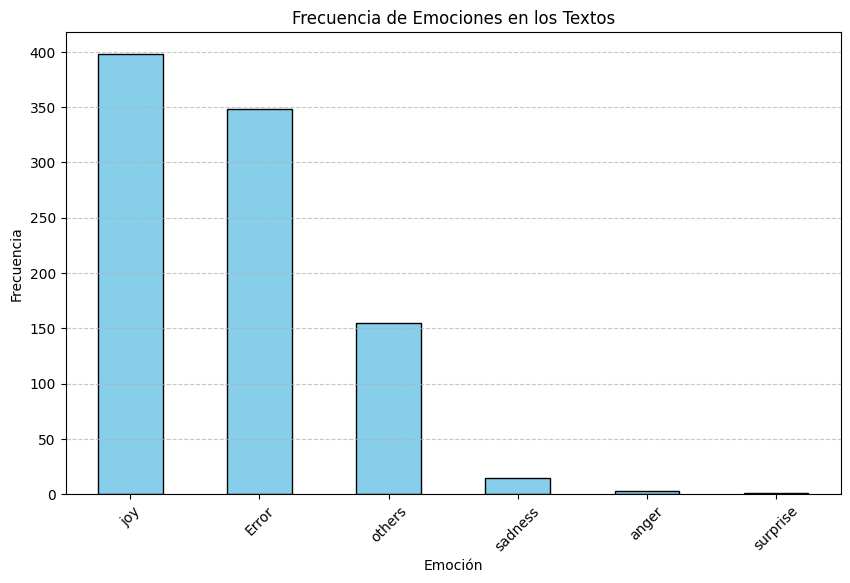

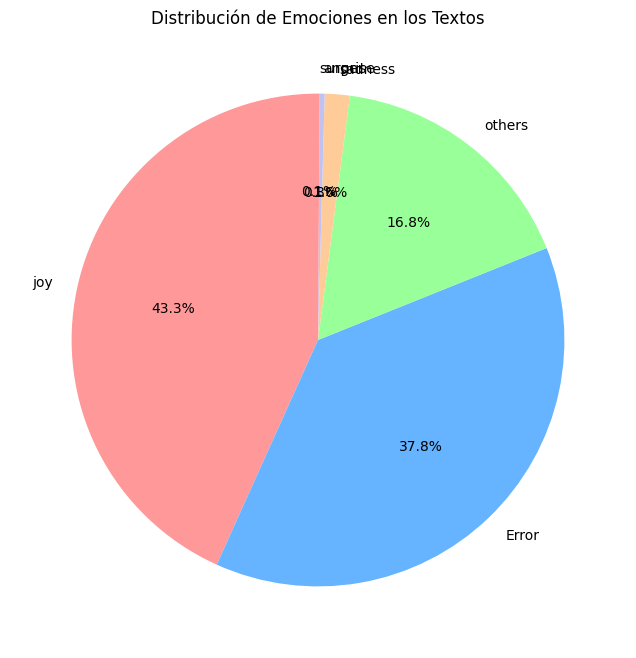

In [69]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada emoción
emotion_counts = data_sentiment['emotion'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de Emociones en los Textos')
plt.xlabel('Emoción')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico circular
plt.figure(figsize=(8, 8))
emotion_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.title('Distribución de Emociones en los Textos')
plt.ylabel('')  # Quitar el título del eje Y
plt.show()


# Anexos III

### Sistema de Recomendación

Creo un recomendador basado en contenido textual. Lo que voy a hacer es identificar la similitud entre elementos basándome en sus descripciones o características textuales. Para esto voy a usar la librería TfidfVectorizer para convertir palabras en vectores y la librería cosine_similarity para verificar la similitud entre las palabras.

In [67]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [77]:
data_books

,Rank,book title,book price,rating,author,year of publication,genre,url
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,amazon.com/Friends-Lovers-Big-Terrible-Thing/d...
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...
...,...,...,...,...,...,...,...,...
95,96,First Little Readers Parent Pack: Guided Readi...,11.40,4.7,Deborah Schecter,2010,Nonfiction,amazon.com/First-Little-Readers-Parent-Pack/dp...
96,97,Hatchet,5.14,4.7,Gary Paulsen,1987,"young adult novel, adventure novel, survival ...",amazon.com/Hatchet-Gary-Paulsen/dp/1416936475/...
97,98,"The Wager: A Tale of Shipwreck, Mutiny and Murder",15.30,4.5,David Grann,2023,Nonfiction,amazon.com/Wager-Tale-Shipwreck-Mutiny-Murder/...
98,99,"I'm Dead, Now What?: Important Information Abo...",12.99,4.6,Peter Pauper Press,2015,Nonfiction,amazon.com/Important-Information-Belongings-Bu...


In [84]:
# Selección de columnas relevantes

df_subset = data_books[['book title', 'author', 'genre']].head(5000)
df_subset['genre'] = df_subset['genre'].fillna("").str.split().str[0]


In [85]:
df_subset

,book title,author,genre
0,"Iron Flame (The Empyrean, 2)",Rebecca Yarros,Fantasy
1,The Woman in Me,Britney Spears,Memoir
2,My Name Is Barbra,Barbra Streisand,Autobiography
3,"Friends, Lovers, and the Big Terrible Thing: A...",Matthew Perry,Memoir
4,How to Catch a Turkey,Adam Wallace,"Childrens,"
...,...,...,...
95,First Little Readers Parent Pack: Guided Readi...,Deborah Schecter,Nonfiction
96,Hatchet,Gary Paulsen,young
97,"The Wager: A Tale of Shipwreck, Mutiny and Murder",David Grann,Nonfiction
98,"I'm Dead, Now What?: Important Information Abo...",Peter Pauper Press,Nonfiction


In [86]:
# Crear archivo csv para usarlo cuando cree la app de Streamlit
csv_file_path = 'data_model_recomendador.csv'
df_subset.to_csv(csv_file_path, index=False)

In [87]:
# Combinar texto relevante para cada libro
df_subset['combined_features'] = df_subset['book title'] + " " + df_subset['author'] + " " + df_subset['genre']

# Reemplazar valores NaN con una cadena vacía
df_subset['combined_features'] = df_subset['combined_features'].fillna("")

# Confirmar que todos los valores sean cadenas
df_subset['combined_features'] = df_subset['combined_features'].astype(str)

# Aplicar TfidfVectorizer nuevamente
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_subset['combined_features'])


In [88]:
# Calcular similitud
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [97]:
def recommend_books(title, cosine_sim=cosine_sim):
    # Encontrar el índice del libro dado
    idx = df_subset[df_subset['book title'] == title].index[0]

    # Obtener las puntuaciones de similitud para ese libro
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordenar libros por similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Seleccionar los 5 libros más similares (excluyendo el propio libro)
    sim_scores = sim_scores[1:6]

    # Obtener los índices de los libros recomendados
    book_indices = [i[0] for i in sim_scores]

    # Retornar los títulos de los libros recomendados
    return df_subset['book title'].iloc[book_indices]


In [94]:
df_subset

,book title,author,genre,combined_features
0,"Iron Flame (The Empyrean, 2)",Rebecca Yarros,Fantasy,"Iron Flame (The Empyrean, 2) Rebecca Yarros Fa..."
1,The Woman in Me,Britney Spears,Memoir,The Woman in Me Britney Spears Memoir
2,My Name Is Barbra,Barbra Streisand,Autobiography,My Name Is Barbra Barbra Streisand Autobiography
3,"Friends, Lovers, and the Big Terrible Thing: A...",Matthew Perry,Memoir,"Friends, Lovers, and the Big Terrible Thing: A..."
4,How to Catch a Turkey,Adam Wallace,"Childrens,","How to Catch a Turkey Adam Wallace Childrens,"
...,...,...,...,...
95,First Little Readers Parent Pack: Guided Readi...,Deborah Schecter,Nonfiction,First Little Readers Parent Pack: Guided Readi...
96,Hatchet,Gary Paulsen,young,Hatchet Gary Paulsen young
97,"The Wager: A Tale of Shipwreck, Mutiny and Murder",David Grann,Nonfiction,"The Wager: A Tale of Shipwreck, Mutiny and Mur..."
98,"I'm Dead, Now What?: Important Information Abo...",Peter Pauper Press,Nonfiction,"I'm Dead, Now What?: Important Information Abo..."


In [98]:
# Normalizar el título del usuario y los del dataset
user_book_normalized = user_book.strip().lower()
df_subset['book title_normalized'] = df_subset['book title'].str.strip().str.lower()

if user_book_normalized in df_subset['book title_normalized'].values:
    recommended_books = recommend_books(user_book)
    print("Si te gustó '{}', también te podrían gustar:".format(user_book))
    print(recommended_books)
else:
    print("El título ingresado no se encuentra en el catálogo. Por favor, intenta con otro.")



Si te gustó 'My Name Is Barbra', también te podrían gustar:
0                         Iron Flame (The Empyrean, 2)
1                                      The Woman in Me
3    Friends, Lovers, and the Big Terrible Thing: A...
4                                How to Catch a Turkey
5                        Fourth Wing (The Empyrean, 1)
Name: book title, dtype: object


In [ ]:
import gradio as gr
import pandas as pd

# Cargar datos desde el archivo CSV
url = "https://raw.githubusercontent.com/dlcastan/ProyectoDSIII/refs/heads/main/data_model_recomendador.csv"
try:
    data_catalog = pd.read_csv(url)
    print("Datos cargados con éxito.")
    print(data_catalog.head())  # Verifica los datos cargados
except Exception as e:
    data_catalog = None
    print(f"Error al cargar los datos: {e}")

# Definir la función de recomendación
def recommend_books(book_title):
    if data_catalog is None:
        return "Error: No se pudieron cargar los datos del catálogo."

    # Asegúrate de que las columnas existen
    if 'book_name' not in data_catalog.columns or 'recommended_books' not in data_catalog.columns:
        return "Error: Columnas 'book_name' o 'recommended_books' no encontradas en el catálogo."

    # Normalizar los títulos para comparación
    data_catalog['book_name_normalized'] = data_catalog['book_name'].str.strip().str.lower()
    book_title_normalized = book_title.strip().lower()

    # Depuración
    print(f"Título ingresado (normalizado): {book_title_normalized}")
    print("Títulos en el catálogo (normalizados):")
    print(data_catalog['book_name_normalized'].head())

    # Filtra el libro ingresado
    recommendations = data_catalog[data_catalog['book_name_normalized'] == book_title_normalized]

    if not recommendations.empty:
        return recommendations[['book_name', 'recommended_books']]
    else:
        return None

# Función interactiva para la interfaz
def recommend_interactive(book_title):
    try:
        recommendations = recommend_books(book_title)
        if isinstance(recommendations, pd.DataFrame) and not recommendations.empty:
            return recommendations.to_string(index=False)
        else:
            return "El libro no se encuentra en el catálogo."
    except Exception as e:
        return f"Error: {str(e)}"

# Crear una interfaz con Gradio
with gr.Blocks() as demo:
    gr.Markdown("# Recomendador de Libros")
    input_text = gr.Textbox(label="Ingresa el título del libro")
    output_text = gr.Textbox(label="Recomendaciones")
    submit_button = gr.Button("Recomendar")

    # Conectar el botón a la función
    submit_button.click(
        recommend_interactive,
        inputs=input_text,
        outputs=output_text
    )

# Lanzar la interfaz
demo.launch()



Datos cargados con éxito.
                                          book title            author  \
0                       Iron Flame (The Empyrean, 2)    Rebecca Yarros   
1                                    The Woman in Me    Britney Spears   
2                                  My Name Is Barbra  Barbra Streisand   
3  Friends, Lovers, and the Big Terrible Thing: A...     Matthew Perry   
4                              How to Catch a Turkey      Adam Wallace   

                                 genre  
0        F a n t a s y   R o m a n c e  
1                          M e m o i r  
2            A u t o b i o g r a p h y  
3                          M e m o i r  
4  C h i l d r e n s ,   F i c t i o n  
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: 